In [132]:
#Importing Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,root_mean_squared_error,r2_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd




In [133]:
#Read file
df = pd.read_csv("insurance.csv")

In [134]:
#show first 5 columns
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [135]:
#size of data
df.shape

(1338, 7)

In [136]:
#checking null values
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [137]:
#info about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [138]:
#data visualization
sns.set()

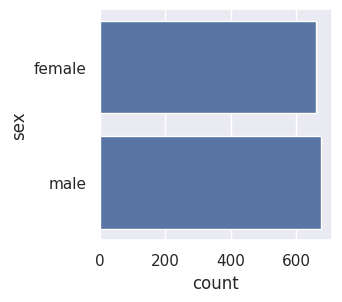

In [139]:
#make a count plot for gender
plt.figure(figsize=(3,3))
sns.countplot(df['sex'])
plt.show()

<ipython-input-140-9a254fdb9566>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


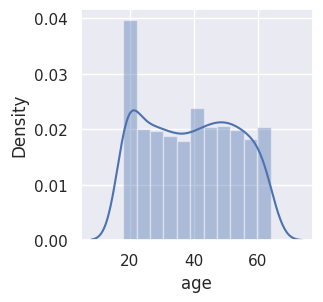

In [140]:
#make a distplot for age
plt.figure(figsize=(3,3))
sns.distplot(df['age'])
plt.show()

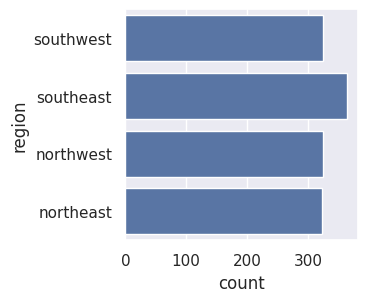

In [141]:
#make a countplot for region
plt.figure(figsize=(3,3))
sns.countplot(df['region'])
plt.show()

In [143]:
# This filters out non-numeric columns
df.corr(numeric_only=True)["charges"]


,charges
age,0.299008
bmi,0.198341
children,0.067998
charges,1.000000


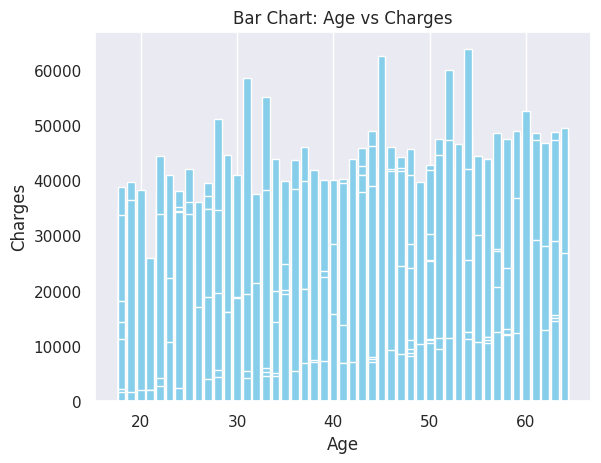

In [144]:
plt.bar(df["age"], df["charges"], color="skyblue")

plt.xlabel("Age")
plt.ylabel("Charges")
plt.title("Bar Chart: Age vs Charges")
plt.grid(axis='y')
plt.show()

<ipython-input-145-d0041ce7657c>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['children'])


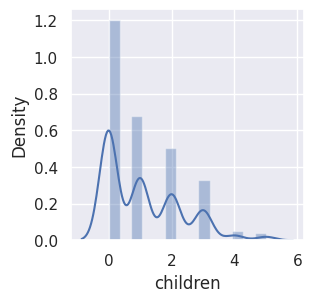

In [145]:
#make a distplot for children
plt.figure(figsize=(3,3))
sns.distplot(df['children'])
plt.show()

In [146]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [147]:
#Encoding
df.replace({"sex":{"male":0,"female":1}},inplace=True)
df.replace({"smoker":{"yes":0,"no":1}},inplace=True)
df.replace({"region":{"southwest":0,"southeast":1,"northeast":2,"northwest":3}},inplace=True)

<ipython-input-147-b0feae38be44>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({"sex":{"male":0,"female":1}},inplace=True)
<ipython-input-147-b0feae38be44>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({"smoker":{"yes":0,"no":1}},inplace=True)
<ipython-input-147-b0feae38be44>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.se

In [148]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,0,16884.92400
1,18,0,33.770,1,1,1,1725.55230
2,28,0,33.000,3,1,1,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


In [149]:
#splitting features and target
X = df.drop(columns='charges',axis=1)
y = df['charges']

In [150]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       0
1      18    0  33.770         1       1       1
2      28    0  33.000         3       1       1
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       1
1336   21    1  25.800         0       1       0
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [151]:
#Train Test Split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=42)

In [152]:
#Model Training
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [153]:
#Evaluation
y_pred = model.predict(X_test)

In [154]:
#mean squared error
mse = mean_squared_error(y_test,y_pred)
print(mse)

33736500.46760338


In [155]:
#mean absolute error
mae = mean_absolute_error(y_test,y_pred)
print(mae)

4196.9632257449375


In [156]:
#r2score
r2s = r2_score(y_test,y_pred)
print(r2s)

0.7826938736089379


SECTION : 2
Model Training using Pipeline Method

In [157]:
#Load Data
df2 = pd.read_csv("insurance.csv")

In [159]:
#Splitting X and y
X = df.drop(columns="charges",axis=1)
y = df['charges']

In [160]:
#seperate categorical features
categorical = ['sex','smoker','region']
numerical = ['age','bmi','children']


In [161]:

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

preprocessor = ColumnTransformer(
    transformers = [
        ("cat",OneHotEncoder(handle_unknown='ignore'),categorical)
    ],
    remainder = "passthrough" #keeps numeric columns
)

In [162]:
#model training using pipeline
from sklearn.pipeline import Pipeline
model_pipeline = Pipeline(steps= [
    ("preprocessor",preprocessor),
    ("regressor",LinearRegression())
])

In [163]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=42)

In [164]:
model_pipeline.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('regressor', LinearRegression())])

In [165]:
#prediction
sample_input = pd.DataFrame ([{
    "age":33,
    "sex":'female',
    "bmi":33.6,
    "children":1,
    "smoker":'yes',
    "region":'southeast'
}])

In [166]:
predicted_charge = model_pipeline.predict(sample_input)
print("The predicted insurance charge is",predicted_charge)

The predicted insurance charge is [19657.25110892]
